# Project 1: Houston Flights
### Group members: Jingmin Chen, Jiaqi Min, Yusen Wu
### Dataset: hflights
### Research questions: 
### 1) What is the carrier least likely to delay? 
### 2) What is the fastest flight from George Bush International Airport to Los Angeles International Airport? 
### 3) What is the most common reason for American Airlines to cancel a flight? 
### 4) What is the farthest flight departures from George Bush International Airport? 

## Part I: Preparation for the reseach

In [10]:
# import pandas
import pandas as pd
from datetime import datetime
pd.set_option('display.max_columns',None)
# import dataset
filename ="https://raw.githubusercontent.com/jtopor/DAV-5400/master/Project1/hflights.csv"
df = pd.read_csv(filename)
# restore the data into a new dataframe named df1
# print out the first few lines of df1 to see what columns it includes
df1 = df
df1.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted
0,2011,1,1,6,1400.0,1500.0,AA,428,N576AA,60.0,40.0,-10.0,0.0,IAH,DFW,224,7.0,13.0,0,NaN,0
1,2011,1,2,7,1401.0,1501.0,AA,428,N557AA,60.0,45.0,-9.0,1.0,IAH,DFW,224,6.0,9.0,0,NaN,0
2,2011,1,3,1,1352.0,1502.0,AA,428,N541AA,70.0,48.0,-8.0,-8.0,IAH,DFW,224,5.0,17.0,0,NaN,0
3,2011,1,4,2,1403.0,1513.0,AA,428,N403AA,70.0,39.0,3.0,3.0,IAH,DFW,224,9.0,22.0,0,NaN,0
4,2011,1,5,3,1405.0,1507.0,AA,428,N492AA,62.0,44.0,-3.0,5.0,IAH,DFW,224,9.0,9.0,0,NaN,0


In [4]:
df1.rename(columns={'DayofMonth':'Day'}, inplace=True)

In [5]:
#transform the flightdate column into datetime format
df1['flightDate'] = pd.to_datetime(df[['Year', 'Month','Day']])
df1.head()

,Year,Month,Day,DayOfWeek,DepTime,ArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,flightDate
0,2011,1,1,6,1400.0,1500.0,AA,428,N576AA,60.0,40.0,-10.0,0.0,IAH,DFW,224,7.0,13.0,0,NaN,0,2011-01-01
1,2011,1,2,7,1401.0,1501.0,AA,428,N557AA,60.0,45.0,-9.0,1.0,IAH,DFW,224,6.0,9.0,0,NaN,0,2011-01-02
2,2011,1,3,1,1352.0,1502.0,AA,428,N541AA,70.0,48.0,-8.0,-8.0,IAH,DFW,224,5.0,17.0,0,NaN,0,2011-01-03
3,2011,1,4,2,1403.0,1513.0,AA,428,N403AA,70.0,39.0,3.0,3.0,IAH,DFW,224,9.0,22.0,0,NaN,0,2011-01-04
4,2011,1,5,3,1405.0,1507.0,AA,428,N492AA,62.0,44.0,-3.0,5.0,IAH,DFW,224,9.0,9.0,0,NaN,0,2011-01-05


# Part II: Reseach Questions

## 1. What is the carrier least likely to delay?
### Who ask: customers who want to find a reliable carrier that less possibly to delay a flight
### Method: calculate the percentage of arrival delayed flights for each carrier and compare among them

In [12]:
# count number of flights for each carrier
b = df1.groupby(['UniqueCarrier']).count()['ArrDelay']

UniqueCarrier
AA    0.347222
AS    0.568966
B6    0.387097
CO    0.512930
DL    0.411765
EV    0.406250
F9    0.822581
FL    0.398496
MQ    0.421538
OO    0.541364
UA    0.377551
US    0.296296
WN    0.569948
XE    0.480256
Name: ArrDelay, dtype: float64


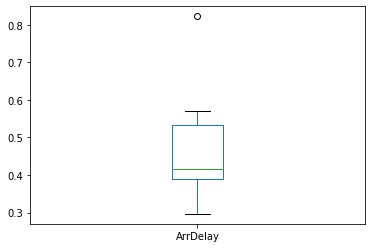

In [13]:
# count number of arrival delayed flights for each carrier
a = df1[df1['ArrDelay']>=0].groupby(['UniqueCarrier']).count()['ArrDelay']
# calculate the percentage of delayed flights
c = (a/b)
print(c)
# generate a boxplot for the percentage values
c.plot(kind = 'box')

         ArrDelay
count  297.000000
mean    -3.595960
std     22.515724
min    -42.000000
25%    -15.000000
50%     -8.000000
75%      2.000000
max    166.000000


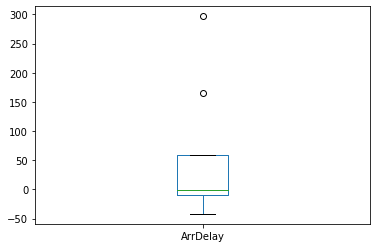

In [17]:
# according to observation US Airways (code US) has the smallest delay percentage
# generate descriptive statistics and a boxplot for this carrier
b = df1[['ArrDelay']][df1['UniqueCarrier'] =='US'].describe()
print(b)
b.plot(kind = 'box')

## 2. What is the fastest flight from George Bush International Airport to Los Angeles International Airport?
### Who ask: A customer who needs to travel from Houston to Los Angeles preferring these two airports wants to choose the fastest flights
### Method: Select all the flights from IAH to LAX, group by flight number, calculate average airtime for each flight number

In [16]:
# select all the flights with origin 'IAH' and destination 'LAX'
# group by flight number
# calculate average air time of each flight number
df1[(df1['Origin'] == 'IAH') & (df1['Dest'] == 'LAX')].groupby(['FlightNum']).mean()['AirTime']

FlightNum
47      194.615385
52      193.000000
137     192.971429
195     208.333333
595     201.500000
695     209.666667
795     195.771429
1095    193.257143
1495    192.200000
1558    199.500000
1595    207.000000
1605    194.888889
1695    196.028571
1795    191.470588
Name: AirTime, dtype: float64

## 3. What is the most common reason for American Airlines to cancel a flight?
### Who ask: A customer who has American Airlines' membership and always flies with AA wants to know the major reason of cancellation
### Method: Select all the AA flights, group by cancellation code, count number of flights for each cancellation code

CancellationCode
A     2
B    11
C     1
dtype: int64


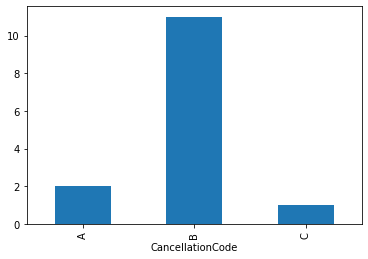

In [86]:
# select all the AA flights
# group by cancellation code
# use size function to count
a = df[df.UniqueCarrier == 'AA'][['UniqueCarrier', 'CancellationCode']].groupby(['CancellationCode']).size()
# print out a frequency table
print(a)
# draw a bar chart for the frequency table
a.plot(kind = 'bar')

## 4. What is the farthest flight departures from George Bush International Airport?
### Who ask: A Houston local resident lives near the airport wants to know what is the farthst place he can go by taking a direct flight from IAH
### Method: Select all the flights from IAH, find out the largest distance value

In [110]:
# select all the flights with origin 'IAH'
# use max function to find the largest distance value
# print out origin, destination, and distance
df1[(df1['Origin'] == 'IAH') & (df['Distance'] == df['Distance'].max())][['Origin', 'Dest', 'Distance']].head(1)

,Origin,Dest,Distance
355,IAH,HNL,3904


## Part III: Conclusion
### Question 1.
#### Since there are only 14 observations, we can simply see without further coding that US airways has a lowest delay percentage.
#### From the descriptive statistics of US Airways delay information, we know that over half of their flights arrive even earlier than the schduled time. 
### Question 2. 
#### Since there are only 14 observations, we can simply see without further coding that flight number 1795 has a smallest average airtime.
### Question 3. 
#### Since there are only 3 observations, we can simply see without further coding that cancellation code B is the most common reason, which is weather. 
### Question 4. 
#### The destination with the farthest distance is HNL, Daniel K. Inouye International Airport in Honolulu, Hawai. 